In [1]:
%matplotlib inline


# Extracting signals from a brain parcellation

Here we show how to extract signals from a brain parcellation and compute
a correlation matrix.

We also show the importance of defining good confounds signals: the
first correlation matrix is computed after regressing out simple
confounds signals: movement regressors, white matter and CSF signals, ...
The second one is without any confounds: all regions are connected to each
other. Finally we demonstrated the functionality of
:func:`nilearn.interfaces.fmriprep.load_confounds` to flexibly select confound
variables from :term:`fMRIPrep` outputs while following some implementation
guideline of :term:`fMRIPrep` confounds documentation
[](https://fmriprep.org/en/stable/outputs.html#confounds).

One reference that discusses the importance of confounds is [Varoquaux and
Craddock, Learning and comparing functional connectomes across subjects,
NeuroImage 2013](http://www.sciencedirect.com/science/article/pii/S1053811913003340).

## Retrieve the atlas and the data



In [2]:
from nilearn import plotting as nplot

from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
# print(f'Atlas filename for this dataset: {atlas_filename.shape}')
labels = dataset.labels

my_data_dir = "./dataset"

print('Atlas ROIs are located in nifti image (4D) at: %s' %
      atlas_filename)  # 4D data

# One subject of brain development fmri data
data = datasets.fetch_development_fmri(data_dir=my_data_dir, n_subjects=10, reduce_confounds=True)
fmri_filenames = data.func
print(fmri_filenames)
reduced_confounds = data.confounds  # This is a preselected set of confounds

Atlas ROIs are located in nifti image (4D) at: <class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform

 ...done. (3 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5521408 of 5642698 bytes (97.9%,    0.1s remaining) ...done. (7 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 3801088 of 4946416 bytes (76.8%,    0.6s remaining) ...done. (7 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5357568 of 6293165 bytes (85.1%,    0.5s remaining) ...done. (8 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5210112 of 6136523 bytes (84.9%,    0.5s remaining) ...done. (7 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5423104 of 5837641 bytes (92.9%,    0.2s remaining) ...done. (7 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5144576 of 6118892 bytes (84.1%,    0.6s remaining) ...done. (7 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5619712 of 6453693 bytes (87.1%,    0.5s remaining) ...done. (7 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5160960 of 6176491 bytes (83.6%,    0.6s remaining) ...done. (8 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5701632 of 6225801 bytes (91.6%,    0.3s remaining) ...done. (6 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5062656 of 6232787 bytes (81.2%,    0.7s remaining)

['./dataset/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', './dataset/development_fmri/development_fmri/sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', './dataset/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', './dataset/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', './dataset/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', './dataset/development_fmri/development_fmri/sub-pixar004_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', './dataset/development_fmri/development_fmri/sub-pixar005_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', './dataset/development_fmri/development_fmri/sub-pixar006_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', './dataset/development_

 ...done. (8 seconds, 0 min)


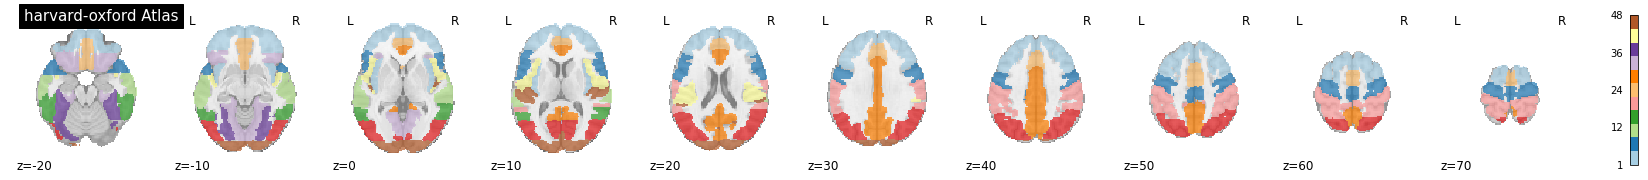

In [4]:
# visualize the brain parcellation map

nplot.plot_roi(atlas_filename,
			cut_coords=(-20,-10,0,10,20,30,40,50,60,70),
			display_mode='z',
			colorbar=True,
			cmap='Paired',
			title='harvard-oxford Atlas')

In [ ]:
my_data_dir = f"./dataset"

In [5]:
my_data_dir

'./dataset'

In [15]:
type(atlas_filename)

nibabel.nifti1.Nifti1Image

In [7]:
fmri_filenames[15]

IndexError: list index out of range

## Extract signals on a parcellation defined by labels
Using the NiftiLabelsMasker



In [30]:
from nilearn.maskers import NiftiMasker
from nilearn.maskers import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
filename_dict = {}
for k in range(10):
     filename_dict["time_series_{0}".format(k)] = masker.fit_transform(fmri_filenames[k], confounds=reduced_confounds)
filename_dict.keys()

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling labels
[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
[Memory]0.8s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,

dict_keys(['time_series_0', 'time_series_1', 'time_series_2', 'time_series_3', 'time_series_4', 'time_series_5', 'time_series_6', 'time_series_7', 'time_series_8', 'time_series_9'])

In [31]:
masker

NiftiLabelsMasker(labels_img=<nibabel.nifti1.Nifti1Image object at 0x7fba7465bd60>,
                  memory=Memory(location=nilearn_cache/joblib),
                  standardize=True, verbose=5)

In [29]:
# 
import pandas as pd
filename_dict.keys()


dict_keys(['time_series_0', 'time_series_1', 'time_series_2', 'time_series_3', 'time_series_4', 'time_series_5', 'time_series_6', 'time_series_7', 'time_series_8', 'time_series_9'])

In [ ]:
time_series_0

In [ ]:
d

In [ ]:
my_variables = {}
i = 0
for j in range(5):
    i += 1
    my_variables["w" + str(i)] = function(i)

In [ ]:
print (data.func[0])

In [ ]:
time_series.shape

In [ ]:
print(type(time_series_0))

In [ ]:
print(len(fmri_filenames))

## Compute and display a correlation matrix



In [ ]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series_0])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title="Confounds",
                     reorder=True)

## Extract signals and compute a connectivity matrix without confounds removal
After covering the basic of signal extraction and functional connectivity
matrix presentation, let's look into the impact of confounds to :term:`fMRI`
signal and functional connectivity. Firstly let's find out what a functional
connectivity matrix looks like without confound removal.



In [ ]:
time_series = masker.fit_transform(fmri_filenames)
# Note how we did not specify confounds above. This is bad!

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

np.fill_diagonal(correlation_matrix, 0)


plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title='No confounds', reorder=True)

## Load confounds from file using a flexible strategy with fmriprep interface

To use these flexible strategy, the fMRI data must be preprocessed via fMRIPrep functional derivative directory from the 1.2.x series. The compcor noise component requires 1.4.x series or above.

It ensures two things:

1. The correct regressors are selected with provided strategy, and

2. Volumes such as non-steady-state and/or high motion volumes are masked
   out correctly.

Let's try a simple strategy removing motion, white matter signal,
cerebrospinal fluid signal with high-pass filtering.

In [ ]:
from nilearn.interfaces.fmriprep import load_confounds


confounds_simple, sample_mask = load_confounds(
    fmri_filenames,
    strategy=["high_pass", "motion", "wm_csf"],
    motion="basic", wm_csf="basic")

print("The shape of the confounds matrix is:", confounds_simple.shape)
print(confounds_simple.columns)

time_series = masker.fit_transform(fmri_filenames,
                                   confounds=confounds_simple,
                                   sample_mask=sample_mask)

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title='Motion, WM, CSF',
                     reorder=True)

## Motion-based scrubbing
With a scrubbing-based strategy,
:func:`~nilearn.interfaces.fmriprep.load_confounds` returns a `sample_mask`
that removes the index of volumes exceeding the framewise displacement and
standardised DVARS threshold, and all the continuous segment with less than
five volumes. Before applying scrubbing, it's important to access the
percentage of volumns scrubbed. Scrubbing is not a suitable strategy for
datasets with too many high motion subjects.
On top of the simple strategy above, let's add scrubbing to our
strategy.



In [ ]:

confounds_scrub, sample_mask = load_confounds(
    fmri_filenames,
    strategy=["high_pass", "motion", "wm_csf", "scrub"],
    motion="basic", wm_csf="basic",
    scrub=5, fd_threshold=0.2, std_dvars_threshold=3)

print("After scrubbing, {} out of {} volumes remains".format(
    sample_mask.shape[0], confounds_scrub.shape[0]))
print("The shape of the confounds matrix is:", confounds_simple.shape)
print(confounds_scrub.columns)

time_series = masker.fit_transform(fmri_filenames,
                                   confounds=confounds_scrub,
                                   sample_mask=sample_mask)

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8,
                     title='Motion, WM, CSF, Scrubbing',
                     reorder=True)

## The impact of global signal removal
Global signal removes the grand mean from your signal. The benefit is that
it can remove impacts of physiological artifacts with minimal impact on the
degrees of freedom. The downside is that one cannot get insight into variance
explained by certain sources of noise. Now let's add global signal to the
simple strategy and see its impact.



In [ ]:
confounds_minimal_no_gsr, sample_mask = load_confounds(
    fmri_filenames,
    strategy=["high_pass", "motion", "wm_csf", "global_signal"],
    motion="basic", wm_csf="basic", global_signal="basic")
print("The shape of the confounds matrix is:",
      confounds_minimal_no_gsr.shape)
print(confounds_minimal_no_gsr.columns)

time_series = masker.fit_transform(fmri_filenames,
                                   confounds=confounds_minimal_no_gsr,
                                   sample_mask=sample_mask)

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8,
                     title='Motion, WM, CSF, GSR',
                     reorder=True)

## Using predefined strategies
Instead of customising the strategy through
:func:`nilearn.interfaces.fmriprep.load_confounds`, one can use a predefined
strategy with :func:`nilearn.interfaces.fmriprep.load_confounds_strategy`.
Based on the confound variables generated through :term:`fMRIPrep`, and past
benchmarks studies (:footcite:`Ciric2017`, :footcite:`Parker2018`): `simple`,
`scrubbing`, `compcor`, `ica_aroma`.
The following examples shows how to use the `simple` strategy and overwrite
the motion default to basic.



In [ ]:
from nilearn.interfaces.fmriprep import load_confounds_strategy

# use default parameters
confounds, sample_mask = load_confounds_strategy(
    fmri_filenames, denoise_strategy="simple", motion="basic"
)
time_series = masker.fit_transform(fmri_filenames,
                                   confounds=confounds,
                                   sample_mask=sample_mask)

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8,
                     title='simple',
                     reorder=True)

# add optional parameter global signal
confounds, sample_mask = load_confounds_strategy(
    fmri_filenames, denoise_strategy="simple",
    motion="basic", global_signal="basic"
)
time_series = masker.fit_transform(fmri_filenames,
                                   confounds=confounds,
                                   sample_mask=sample_mask)

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8,
                     title='simple',
                     reorder=True)

plotting.show()